# Performance Python

In [1]:
import warnings
warnings.simplefilter('ignore')

## Loops

### Python

In [2]:
import random

In [3]:
def average_py(n):
    s = 0  
    for i in range(n):
        s += random.random()  
    return s / n  

In [4]:
n = 10000000  

In [5]:
%time average_py(n)  

CPU times: user 723 ms, sys: 9.9 ms, total: 732 ms
Wall time: 775 ms


0.5001063631480271

In [6]:
%timeit average_py(n)  

854 ms ± 43.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%time sum([random.random() for _ in range(n)]) / n  

CPU times: user 1.45 s, sys: 270 ms, total: 1.72 s
Wall time: 1.91 s


0.4999973634370638

### NumPy 

In [8]:
import numpy as np

In [9]:
def average_np(n):
    s = np.random.random(n)  
    return s.mean()  

In [10]:
%time average_np(n)

CPU times: user 215 ms, sys: 48.4 ms, total: 263 ms
Wall time: 99.4 ms


0.49985080662111303

In [11]:
%timeit average_np(n)

83.6 ms ± 5.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
s = np.random.random(n)
s.nbytes  

80000000

### Numba

In [14]:
import numba

In [15]:
average_nb = numba.jit(average_py, nopython=True)  

In [16]:
%time average_nb(n)  

CPU times: user 1.19 s, sys: 474 ms, total: 1.67 s
Wall time: 20.5 s


0.49986617525389987

In [17]:
%time average_nb(n)  

CPU times: user 46.3 ms, sys: 1.02 ms, total: 47.3 ms
Wall time: 49.4 ms


0.5000352988684785

In [18]:
%timeit average_nb(n)  

44.4 ms ± 1.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Cython

In [21]:
%load_ext Cython

In [22]:
%%cython -a
import random  
def average_cy1(int n):  
    cdef int i  
    cdef float s = 0  
    for i in range(n):
        s += random.random()
    return s / n

Content of stderr:
/Users/aakashagarwal/.ipython/cython/_cython_magic_7ef3e7f149182fad9520a5204a225ec49ef4899b.c:3969:26: warning: code will never be executed [-Wunreachable-code]
                module = PyImport_ImportModuleLevelObject(
                         ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1 warning generated.
/Users/aakashagarwal/.ipython/cython/_cython_magic_7ef3e7f149182fad9520a5204a225ec49ef4899b.c:3969:26: warning: code will never be executed [-Wunreachable-code]
                module = PyImport_ImportModuleLevelObject(
                         ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1 warning generated.

In [23]:
%time average_cy1(n)

CPU times: user 839 ms, sys: 7.12 ms, total: 846 ms
Wall time: 856 ms


0.5000115633010864

In [24]:
%timeit average_cy1(n)

852 ms ± 77.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%%cython
from libc.stdlib cimport rand  
cdef extern from 'limits.h':  
    int INT_MAX  
cdef int i
cdef float rn
for i in range(5):
    rn = rand() / INT_MAX  
    print(rn)

Content of stderr:
/Users/aakashagarwal/.ipython/cython/_cython_magic_3f51bce0a5371140f4634abe266d96f1be970adf.c:2408:7: warning: code will never be executed [-Wunreachable-code]
      PyErr_SetString(PyExc_ZeroDivisionError, "float division");
      ^~~~~~~~~~~~~~~
1 warning generated.
/Users/aakashagarwal/.ipython/cython/_cython_magic_3f51bce0a5371140f4634abe266d96f1be970adf.c:2408:7: warning: code will never be executed [-Wunreachable-code]
      PyErr_SetString(PyExc_ZeroDivisionError, "float division");
      ^~~~~~~~~~~~~~~
1 warning generated.0.3835020661354065
0.5194163918495178
0.8309653401374817
0.03457210958003998
0.05346163362264633


In [26]:
%%cython -a
from libc.stdlib cimport rand  
cdef extern from 'limits.h':  
    int INT_MAX  
def average_cy2(int n):
    cdef int i
    cdef float s = 0
    for i in range(n):
        s += rand() / INT_MAX  
    return s / n

Content of stderr:
/Users/aakashagarwal/.ipython/cython/_cython_magic_2129c55c2500e28c840561b0b42711b43ee1c2a2.c:2355:7: warning: code will never be executed [-Wunreachable-code]
      PyErr_SetString(PyExc_ZeroDivisionError, "float division");
      ^~~~~~~~~~~~~~~
1 warning generated.
/Users/aakashagarwal/.ipython/cython/_cython_magic_2129c55c2500e28c840561b0b42711b43ee1c2a2.c:2355:7: warning: code will never be executed [-Wunreachable-code]
      PyErr_SetString(PyExc_ZeroDivisionError, "float division");
      ^~~~~~~~~~~~~~~
1 warning generated.

In [27]:
%time average_cy2(n)

CPU times: user 54 ms, sys: 1.18 ms, total: 55.2 ms
Wall time: 58 ms


0.500017523765564

In [28]:
%timeit average_cy2(n)

53.6 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Prime Numbers

### Pure Python

In [29]:
def is_prime(I):
    if I % 2 == 0: return False  
    for i in range(3, int(I ** 0.5) + 1, 2):  
        if I % i == 0: return False  
    return True  

In [30]:
n = int(1e8 + 3)  
n

100000003

In [31]:
%time is_prime(n)

CPU times: user 24 μs, sys: 1 μs, total: 25 μs
Wall time: 27.2 μs


False

In [32]:
p1 = int(1e8 + 7)  
p1

100000007

In [33]:
%time is_prime(p1)

CPU times: user 566 μs, sys: 17 μs, total: 583 μs
Wall time: 643 μs


True

In [34]:
p2 = 100109100129162907  

In [35]:
p2.bit_length()  

57

In [36]:
%time is_prime(p2)

CPU times: user 12.4 s, sys: 96.2 ms, total: 12.5 s
Wall time: 13 s


True

### Numba

In [37]:
is_prime_nb = numba.jit(is_prime, nopython=True)

In [38]:
%time is_prime_nb(n)  

CPU times: user 293 ms, sys: 260 ms, total: 552 ms
Wall time: 1.08 s


False

In [39]:
%time is_prime_nb(n)  

CPU times: user 8 μs, sys: 0 ns, total: 8 μs
Wall time: 10 μs


False

In [40]:
%time is_prime_nb(p1)

CPU times: user 26 μs, sys: 1 μs, total: 27 μs
Wall time: 29.1 μs


True

In [41]:
%time is_prime_nb(p2)  

CPU times: user 1.39 s, sys: 19.7 ms, total: 1.41 s
Wall time: 1.44 s


True

### Cython

In [42]:
%%cython
def is_prime_cy1(I):
    if I % 2 == 0: return False
    for i in range(3, int(I ** 0.5) + 1, 2):
        if I % i == 0: return False
    return True

In [43]:
%timeit is_prime(p1)

333 μs ± 2.18 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [44]:
%timeit is_prime_cy1(p1)

271 μs ± 46.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [45]:
%%cython
def is_prime_cy2(long I):  
    cdef long i  
    if I % 2 == 0: return False
    for i in range(3, int(I ** 0.5) + 1, 2):
        if I % i == 0: return False
    return True

In [46]:
%timeit is_prime_cy2(p1)

17.1 μs ± 388 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [47]:
%time is_prime_nb(p2)

CPU times: user 1.36 s, sys: 9.17 ms, total: 1.37 s
Wall time: 1.37 s


True

In [48]:
%time is_prime_cy2(p2)

CPU times: user 1.41 s, sys: 11.8 ms, total: 1.43 s
Wall time: 1.43 s


True

### Multiprocessing

In [52]:
import multiprocessing as mp

In [53]:
# pool = mp.Pool(processes=4)  

<b style="color: red;">This currently does not work on Macs with Apple Silicon.</b>

In [54]:
# %time pool.map(is_prime, 10 * [p1])  

In [55]:
# %time pool.map(is_prime_nb, 10 * [p2])  

In [56]:
# %time pool.map(is_prime_cy2, 10 * [p2])  

## Fibonacci Numbers

### Recursive Algorithm

In [57]:
from numba import njit

In [58]:
def fib_rec_py1(n):
    if n < 2:
        return n
    else:
        return fib_rec_py1(n - 1) + fib_rec_py1(n - 2)

In [59]:
%time fib_rec_py1(35)

CPU times: user 1.79 s, sys: 18.4 ms, total: 1.81 s
Wall time: 2.09 s


9227465

In [60]:
@njit
def fib_rec_nb(n):
    if n < 2:
        return n
    else:
        return fib_rec_nb(n - 1) + fib_rec_nb(n - 2)

In [61]:
%time fib_rec_nb(35)

CPU times: user 147 ms, sys: 51.1 ms, total: 198 ms
Wall time: 271 ms


9227465

In [62]:
%time fib_rec_nb(35)

CPU times: user 71.6 ms, sys: 1.63 ms, total: 73.3 ms
Wall time: 82.4 ms


9227465

In [63]:
%%cython
def fib_rec_cy(int n):
    if n < 2:
        return n
    else:
        return fib_rec_cy(n - 1) + fib_rec_cy(n - 2)

In [64]:
%time fib_rec_cy(35)

CPU times: user 1.14 s, sys: 13.1 ms, total: 1.15 s
Wall time: 1.16 s


9227465

In [65]:
from functools import lru_cache as cache

In [66]:
@cache(maxsize=None)  
def fib_rec_py2(n):
    if n < 2:
        return n
    else:
        return fib_rec_py2(n - 1) + fib_rec_py2(n - 2)

In [67]:
%time fib_rec_py2(35)  

CPU times: user 39 μs, sys: 33 μs, total: 72 μs
Wall time: 78 μs


9227465

In [68]:
%time fib_rec_py2(80)  

CPU times: user 37 μs, sys: 10 μs, total: 47 μs
Wall time: 51 μs


23416728348467685

### Iterative Algorithm 

In [69]:
def fib_it_py(n):
    x, y = 0, 1
    for i in range(1, n + 1):
        x, y = y, x + y
    return x

In [70]:
%time fib_it_py(80)

CPU times: user 17 μs, sys: 1 μs, total: 18 μs
Wall time: 21.9 μs


23416728348467685

In [71]:
fib_it_nb = numba.jit(fib_it_py)

In [72]:
%time fib_it_nb(80)

CPU times: user 77 ms, sys: 18.5 ms, total: 95.6 ms
Wall time: 125 ms


23416728348467685

In [73]:
%time fib_it_nb(80)

CPU times: user 7 μs, sys: 0 ns, total: 7 μs
Wall time: 11 μs


23416728348467685

In [74]:
%%cython
def fib_it_cy1(int n):
    cdef long i
    cdef long x = 0, y = 1
    for i in range(1, n + 1):
        x, y = y, x + y
    return x

In [75]:
%time fib_it_cy1(80)

CPU times: user 4 μs, sys: 0 ns, total: 4 μs
Wall time: 8.11 μs


23416728348467685

In [76]:
%%time
fn = fib_rec_py2(150)  
print(fn)  

9969216677189303386214405760200
CPU times: user 113 μs, sys: 29 μs, total: 142 μs
Wall time: 139 μs


In [77]:
fn.bit_length()  

103

In [78]:
%%time 
fn = fib_it_nb(150)  
print(fn)  

6792540214324356296
CPU times: user 259 μs, sys: 123 μs, total: 382 μs
Wall time: 256 μs


In [79]:
fn.bit_length()  

63

In [80]:
%%time
fn = fib_it_cy1(150)  
print(fn)  

6792540214324356296
CPU times: user 62 μs, sys: 8 μs, total: 70 μs
Wall time: 67.9 μs


In [81]:
fn.bit_length()  

63

In [82]:
%%cython
cdef extern from *:
    ctypedef int int128 '__int128_t'  
def fib_it_cy2(int n):
    cdef int128 i  
    cdef int128 x = 0, y = 1  
    for i in range(1, n + 1):
        x, y = y, x + y
    return x

In [83]:
%%time
fn = fib_it_cy2(150)  
print(fn)  

9969216677189303386214405760200
CPU times: user 72 μs, sys: 10 μs, total: 82 μs
Wall time: 88 μs


In [84]:
fn.bit_length()  

103

## The Number Pi

The code example is taken from [StackExchange](https://codereview.stackexchange.com/questions/69370/monte-carlo-pi-calculation).

In [88]:
import random
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%config InlineBackend.figure_format = 'svg'

In [89]:
rn = [(random.random() * 2 - 1, random.random() * 2 - 1)
      for _ in range(500)]

In [90]:
rn = np.array(rn)
rn[:5]

array([[-0.10057398, -0.62149699],
       [ 0.88939512, -0.28437963],
       [ 0.61362619,  0.27620471],
       [-0.27732271,  0.80229195],
       [ 0.06185284, -0.10942963]])

(-1.1, 1.1)

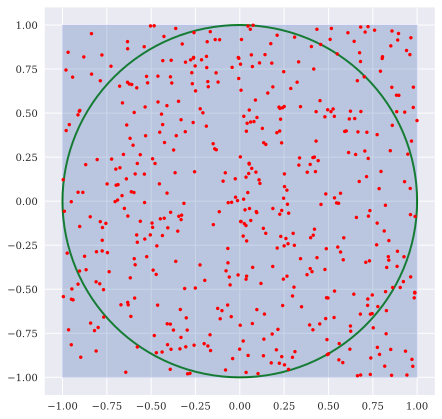

In [91]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)
circ = plt.Circle((0, 0), radius=1, edgecolor='g', lw=2.0,
                  facecolor='None')  
box = plt.Rectangle((-1, -1), 2, 2, edgecolor='b', alpha=0.3)  
ax.add_patch(circ)  
ax.add_patch(box)  
plt.plot(rn[:, 0], rn[:, 1], 'r.')  
plt.ylim(-1.1, 1.1)
plt.xlim(-1.1, 1.1)
# plt.savefig('../../images/ch10/perf_01.png');

In [92]:
n = int(1e7)

In [93]:
%time rn = np.random.random((n, 2)) * 2 - 1

CPU times: user 205 ms, sys: 53.9 ms, total: 259 ms
Wall time: 292 ms


In [94]:
rn.nbytes

160000000

In [95]:
%time distance = np.sqrt((rn ** 2).sum(axis=1))  
distance[:8].round(3)

CPU times: user 200 ms, sys: 98.7 ms, total: 299 ms
Wall time: 449 ms


array([0.888, 0.299, 0.986, 0.793, 0.575, 0.788, 0.326, 0.723])

In [96]:
%time frac = (distance <= 1.0).sum() / len(distance)  

CPU times: user 14.9 ms, sys: 5.92 ms, total: 20.8 ms
Wall time: 28.6 ms


In [97]:
pi_mcs = frac * 4  
pi_mcs  

3.1412872

In [98]:
def mcs_pi_py(n):
    circle = 0
    for _ in range(n):
        x, y = random.random(), random.random()
        if (x ** 2 + y ** 2) ** 0.5 <= 1:
            circle += 1
    return (4 * circle) / n

In [99]:
%time mcs_pi_py(n)

CPU times: user 3.61 s, sys: 27.3 ms, total: 3.64 s
Wall time: 3.73 s


3.1419272

In [100]:
mcs_pi_nb = numba.jit(mcs_pi_py)

In [101]:
%time mcs_pi_nb(n)

CPU times: user 303 ms, sys: 30.5 ms, total: 334 ms
Wall time: 458 ms


3.1411936

In [102]:
%time mcs_pi_nb(n)

CPU times: user 102 ms, sys: 2 ms, total: 104 ms
Wall time: 111 ms


3.1419952

In [103]:
%%cython -a
import random
def mcs_pi_cy1(int n):
    cdef int i, circle = 0
    cdef float x, y, z
    for i in range(n):
        x, y = random.random(), random.random()
        z = (x ** 2 + y ** 2) ** 0.5
        if z <= 1:
            circle += 1
    return (4 * circle) / n

Content of stderr:
/Users/aakashagarwal/.ipython/cython/_cython_magic_adfa9f451a540f01a380b59fdb4cd386ac2d6792.c:4147:26: warning: code will never be executed [-Wunreachable-code]
                module = PyImport_ImportModuleLevelObject(
                         ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1 warning generated.
/Users/aakashagarwal/.ipython/cython/_cython_magic_adfa9f451a540f01a380b59fdb4cd386ac2d6792.c:4147:26: warning: code will never be executed [-Wunreachable-code]
                module = PyImport_ImportModuleLevelObject(
                         ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1 warning generated.

In [104]:
%time mcs_pi_cy1(n)

CPU times: user 1.23 s, sys: 8.1 ms, total: 1.24 s
Wall time: 1.24 s


3.14152

In [105]:
%%cython -a
from libc.stdlib cimport rand
cdef extern from 'limits.h':
    int INT_MAX
def mcs_pi_cy2(int n):
    cdef int i, circle = 0
    cdef float x, y, z
    for i in range(n):
        x, y = rand() / INT_MAX, rand() / INT_MAX
        z = (x ** 2 + y ** 2) ** 0.5
        if z <= 1:
            circle += 1
    return (4 * circle) / n

Content of stderr:
/Users/aakashagarwal/.ipython/cython/_cython_magic_d4dbad3eff386fc1becebe98ce3b35b4fd4b4d04.c:2478:7: warning: code will never be executed [-Wunreachable-code]
      PyErr_SetString(PyExc_ZeroDivisionError, "float division");
      ^~~~~~~~~~~~~~~
/Users/aakashagarwal/.ipython/cython/_cython_magic_d4dbad3eff386fc1becebe98ce3b35b4fd4b4d04.c:2472:7: warning: code will never be executed [-Wunreachable-code]
      PyErr_SetString(PyExc_ZeroDivisionError, "float division");
      ^~~~~~~~~~~~~~~
2 warnings generated.
/Users/aakashagarwal/.ipython/cython/_cython_magic_d4dbad3eff386fc1becebe98ce3b35b4fd4b4d04.c:2478:7: warning: code will never be executed [-Wunreachable-code]
      PyErr_SetString(PyExc_ZeroDivisionError, "float division");
      ^~~~~~~~~~~~~~~
/Users/aakashagarwal/.ipython/cython/_cython_magic_d4dbad3eff386fc1becebe98ce3b35b4fd4b4d04.c:2472:7: warning: code will never be executed [-Wunreachable-code]
      PyErr_SetString(PyExc_ZeroDivisionError, "float d

In [106]:
%time mcs_pi_cy2(n)

CPU times: user 115 ms, sys: 2.84 ms, total: 118 ms
Wall time: 156 ms


3.1419388

## Binomial Trees

### Python

In [107]:
import math

In [108]:
S0 = 36.  
T = 1.0  
r = 0.06  
sigma = 0.2  

In [109]:
def simulate_tree(M):
    dt = T / M  
    u = math.exp(sigma * math.sqrt(dt))  
    d = 1 / u  
    S = np.zeros((M + 1, M + 1))
    S[0, 0] = S0
    z = 1
    for t in range(1, M + 1):
        for i in range(z):
            S[i, t] = S[i, t-1] * u
            S[i+1, t] = S[i, t-1] * d
        z += 1
    return S

In [110]:
np.set_printoptions(formatter={'float':
                               lambda x: '%6.2f' % x})  

In [111]:
simulate_tree(4)  

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [  0.00,  32.57,  36.00,  39.79,  43.97],
       [  0.00,   0.00,  29.47,  32.57,  36.00],
       [  0.00,   0.00,   0.00,  26.67,  29.47],
       [  0.00,   0.00,   0.00,   0.00,  24.13]])

In [112]:
%time simulate_tree(500)  

CPU times: user 98.7 ms, sys: 5.05 ms, total: 104 ms
Wall time: 116 ms


array([[ 36.00,  36.32,  36.65, ..., 3095.69, 3123.50, 3151.57],
       [  0.00,  35.68,  36.00, ..., 3040.81, 3068.13, 3095.69],
       [  0.00,   0.00,  35.36, ..., 2986.89, 3013.73, 3040.81],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.41]])

### NumPy

In [113]:
M = 4

In [114]:
up = np.arange(M + 1)
up = np.resize(up, (M + 1, M + 1))  
up

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [115]:
down = up.T * 2  
down

array([[0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [4, 4, 4, 4, 4],
       [6, 6, 6, 6, 6],
       [8, 8, 8, 8, 8]])

In [116]:
up - down  

array([[ 0,  1,  2,  3,  4],
       [-2, -1,  0,  1,  2],
       [-4, -3, -2, -1,  0],
       [-6, -5, -4, -3, -2],
       [-8, -7, -6, -5, -4]])

In [117]:
dt = T / M

In [118]:
S0 * np.exp(sigma * math.sqrt(dt) * (up - down))  

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [ 29.47,  32.57,  36.00,  39.79,  43.97],
       [ 24.13,  26.67,  29.47,  32.57,  36.00],
       [ 19.76,  21.84,  24.13,  26.67,  29.47],
       [ 16.18,  17.88,  19.76,  21.84,  24.13]])

In [119]:
def simulate_tree_np(M):
    dt = T / M
    up = np.arange(M + 1)
    up = np.resize(up, (M + 1, M + 1))
    down = up.transpose() * 2
    S = S0 * np.exp(sigma * math.sqrt(dt) * (up - down))
    return S

In [120]:
simulate_tree_np(4)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [ 29.47,  32.57,  36.00,  39.79,  43.97],
       [ 24.13,  26.67,  29.47,  32.57,  36.00],
       [ 19.76,  21.84,  24.13,  26.67,  29.47],
       [ 16.18,  17.88,  19.76,  21.84,  24.13]])

In [121]:
%time simulate_tree_np(500)

CPU times: user 4.64 ms, sys: 3.54 ms, total: 8.18 ms
Wall time: 7.83 ms


array([[ 36.00,  36.32,  36.65, ..., 3095.69, 3123.50, 3151.57],
       [ 35.36,  35.68,  36.00, ..., 3040.81, 3068.13, 3095.69],
       [ 34.73,  35.05,  35.36, ..., 2986.89, 3013.73, 3040.81],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.41,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.40,   0.41,   0.41]])

### Numba

In [122]:
simulate_tree_nb = numba.jit(simulate_tree)

In [123]:
simulate_tree_nb(4)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [  0.00,  32.57,  36.00,  39.79,  43.97],
       [  0.00,   0.00,  29.47,  32.57,  36.00],
       [  0.00,   0.00,   0.00,  26.67,  29.47],
       [  0.00,   0.00,   0.00,   0.00,  24.13]])

In [124]:
%time simulate_tree_nb(500)

CPU times: user 620 μs, sys: 1 μs, total: 621 μs
Wall time: 629 μs


array([[ 36.00,  36.32,  36.65, ..., 3095.69, 3123.50, 3151.57],
       [  0.00,  35.68,  36.00, ..., 3040.81, 3068.13, 3095.69],
       [  0.00,   0.00,  35.36, ..., 2986.89, 3013.73, 3040.81],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.41]])

In [125]:
%timeit simulate_tree_nb(500)

173 μs ± 7.41 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Cython

In [126]:
%%cython -a
import numpy as np
cimport cython
from libc.math cimport exp, sqrt
cdef float S0 = 36.
cdef float T = 1.0
cdef float r = 0.06
cdef float sigma = 0.2
def simulate_tree_cy(int M):
    cdef int z, t, i
    cdef float dt, u, d
    cdef float[:, :] S = np.zeros((M + 1, M + 1),
                                  dtype=np.float32)  
    dt = T / M
    u = exp(sigma * sqrt(dt))
    d = 1 / u
    S[0, 0] = S0
    z = 1
    for t in range(1, M + 1):
        for i in range(z):
            S[i, t] = S[i, t-1] * u
            S[i+1, t] = S[i, t-1] * d
        z += 1
    return np.array(S)

Content of stderr:
/Users/aakashagarwal/.ipython/cython/_cython_magic_ae82631203b97ecd4749b696a758ea854555b62d.c:21630:13: warning: code will never be executed [-Wunreachable-code]
            goto bad;
            ^~~~~~~~
/Users/aakashagarwal/.ipython/cython/_cython_magic_ae82631203b97ecd4749b696a758ea854555b62d.c:22309:26: warning: code will never be executed [-Wunreachable-code]
                module = PyImport_ImportModuleLevelObject(
                         ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2 warnings generated.
/Users/aakashagarwal/.ipython/cython/_cython_magic_ae82631203b97ecd4749b696a758ea854555b62d.c:21630:13: warning: code will never be executed [-Wunreachable-code]
            goto bad;
            ^~~~~~~~
/Users/aakashagarwal/.ipython/cython/_cython_magic_ae82631203b97ecd4749b696a758ea854555b62d.c:22309:26: warning: code will never be executed [-Wunreachable-code]
                module = PyImport_ImportModuleLevelObject(
                         ^~~~~~~~~~~~~~~~~~~~~~~~

In [127]:
simulate_tree_cy(4)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [  0.00,  32.57,  36.00,  39.79,  43.97],
       [  0.00,   0.00,  29.47,  32.57,  36.00],
       [  0.00,   0.00,   0.00,  26.67,  29.47],
       [  0.00,   0.00,   0.00,   0.00,  24.13]], dtype=float32)

In [128]:
%time simulate_tree_cy(500)

CPU times: user 1.78 ms, sys: 1.97 ms, total: 3.75 ms
Wall time: 2.06 ms


array([[ 36.00,  36.32,  36.65, ..., 3095.77, 3123.59, 3151.65],
       [  0.00,  35.68,  36.00, ..., 3040.89, 3068.21, 3095.77],
       [  0.00,   0.00,  35.36, ..., 2986.97, 3013.81, 3040.89],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.41]],
      dtype=float32)

In [129]:
%timeit S = simulate_tree_cy(500)

205 μs ± 19.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Monte Carlo Simulation

### Python

In [130]:
M = 100  
I = 50000  

In [131]:
def mcs_simulation_py(p):
    M, I = p
    dt = T / M
    S = np.zeros((M + 1, I))
    S[0] = S0
    rn = np.random.standard_normal(S.shape)  
    for t in range(1, M + 1):  
        for i in range(I):  
            S[t, i] = S[t-1, i] * math.exp((r - sigma ** 2 / 2) * dt +
                                         sigma * math.sqrt(dt) * rn[t, i])  
    return S      

In [132]:
%time S = mcs_simulation_py((M, I))

CPU times: user 4.18 s, sys: 64.3 ms, total: 4.24 s
Wall time: 4.34 s


In [133]:
S[-1].mean()  

38.23135205892639

In [134]:
S0 * math.exp(r * T)  

38.22611567563295

In [135]:
K = 40.  

In [136]:
C0 = math.exp(-r * T) * np.maximum(K - S[-1], 0).mean()  

In [137]:
C0

3.8368637471841196

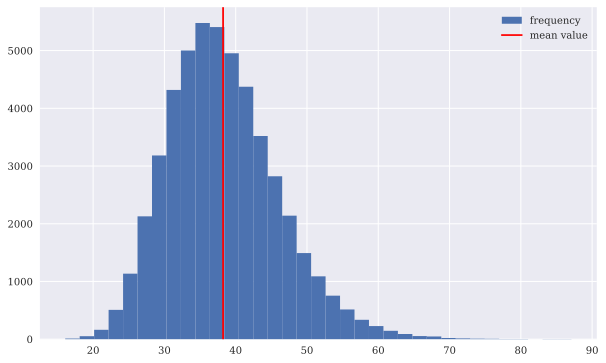

In [138]:
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=35, label='frequency')
plt.axvline(S[-1].mean(), color='r', label='mean value')
plt.legend(loc=0)

### NumPy

In [139]:
def mcs_simulation_np(p):
    M, I = p
    dt = T / M
    S = np.zeros((M + 1, I))
    S[0] = S0
    rn = np.random.standard_normal(S.shape)
    for t in range(1, M + 1):  
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt +
                               sigma * math.sqrt(dt) * rn[t]) 
    return S      

In [140]:
%time S = mcs_simulation_np((M, I))

CPU times: user 433 ms, sys: 73.6 ms, total: 506 ms
Wall time: 221 ms


In [141]:
S[-1].mean()

38.218892852174484

In [142]:
%timeit S = mcs_simulation_np((M, I))

192 ms ± 3.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Numba 

In [143]:
mcs_simulation_nb = numba.jit(mcs_simulation_py)

In [144]:
%time S = mcs_simulation_nb((M, I))  

CPU times: user 599 ms, sys: 33 ms, total: 632 ms
Wall time: 683 ms


In [145]:
%time S = mcs_simulation_nb((M, I))  

CPU times: user 147 ms, sys: 7.7 ms, total: 155 ms
Wall time: 159 ms


In [146]:
S[-1].mean()

38.197023396223926

In [147]:
C0 = math.exp(-r * T) * np.maximum(K - S[-1], 0).mean()

In [148]:
C0

3.851829451638011

In [149]:
%timeit S = mcs_simulation_nb((M, I))  

153 ms ± 3.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Cython &mdash; Sequential

In [150]:
%%cython
import numpy as np
cimport numpy as np
cimport cython
from libc.math cimport exp, sqrt
cdef float S0 = 36.
cdef float T = 1.0
cdef float r = 0.06
cdef float sigma = 0.2
@cython.boundscheck(False)
@cython.wraparound(False)
def mcs_simulation_cy(p):
    cdef int M, I
    M, I = p
    cdef int t, i
    cdef float dt = T / M
    cdef double[:, :] S = np.zeros((M + 1, I))
    cdef double[:, :] rn = np.random.standard_normal((M + 1, I))
    S[0] = S0
    for t in range(1, M + 1):
        for i in range(I):
            S[t, i] = S[t-1, i] * exp((r - sigma ** 2 / 2) * dt +
                                         sigma * sqrt(dt) * rn[t, i])
    return np.array(S) 

Content of stderr:
In file included from /Users/aakashagarwal/.ipython/cython/_cython_magic_0c38b74f37b2c8d3dc4699d5e19f27231dca4c55.c:1251:
In file included from /Users/aakashagarwal/PyCharm/Resources/.venv/lib/python3.12/site-packages/numpy/core/include/numpy/arrayobject.h:5:
In file included from /Users/aakashagarwal/PyCharm/Resources/.venv/lib/python3.12/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /Users/aakashagarwal/PyCharm/Resources/.venv/lib/python3.12/site-packages/numpy/core/include/numpy/ndarraytypes.h:1929:
/Users/aakashagarwal/PyCharm/Resources/.venv/lib/python3.12/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
#warning "Using deprecated NumPy API, disable it with " \
 ^
/Users/aakashagarwal/.ipython/cython/_cython_magic_0c38b74f37b2c8d3dc4699d5e19f27231dca4c55.c:23548:13: warning: cod

In [151]:
%time S = mcs_simulation_cy((M, I))

CPU times: user 210 ms, sys: 43.3 ms, total: 254 ms
Wall time: 255 ms


In [152]:
S[-1].mean()

38.189520353175126

In [153]:
%timeit S = mcs_simulation_cy((M, I))

195 ms ± 8.44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Multiprocessing

In [154]:
import multiprocessing as mp

In [155]:
pool = mp.Pool(processes=4)  

In [156]:
p = 20  

<b style="color: red;">This currently does not work on Macs with Apple Silicon.</b>

In [157]:
# %timeit S = np.hstack(pool.map(mcs_simulation_np, p * [(M, int(I / p))]))

In [158]:
# %timeit S = np.hstack(pool.map(mcs_simulation_nb, p * [(M, int(I / p))]))

In [159]:
# %timeit S = np.hstack(pool.map(mcs_simulation_cy, p * [(M, int(I / p))]))

## Recursive pandas Algorithm

### Data and Formula

In [160]:
import numba
import numpy as np
import pandas as pd

In [161]:
sym = 'SPY'

In [162]:
data = pd.DataFrame(pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                               index_col=0, parse_dates=True)[sym]).dropna()

In [163]:
alpha = 0.25

In [164]:
data['EWMA'] = data[sym]  

In [165]:
%%time
for t in zip(data.index, data.index[1:]):
    data.loc[t[1], 'EWMA'] = (alpha * data.loc[t[1], sym] +
                              (1 - alpha) * data.loc[t[0], 'EWMA'])  

CPU times: user 576 ms, sys: 7.94 ms, total: 583 ms
Wall time: 601 ms


In [166]:
data.head()

,SPY,EWMA
Date,,
2010-01-04,113.33,113.330000
2010-01-05,113.63,113.405000
2010-01-06,113.71,113.481250
2010-01-07,114.19,113.658438
2010-01-08,114.57,113.886328


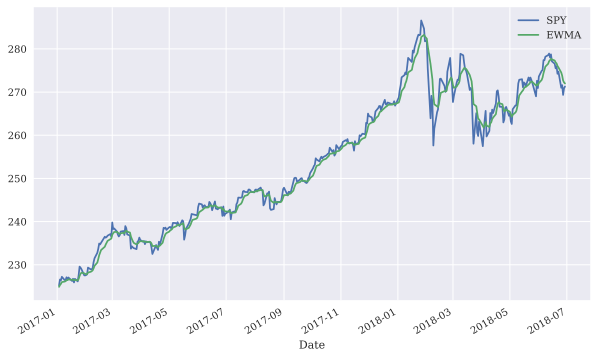

In [167]:
data[data.index > '2017-1-1'].plot(figsize=(10, 6));

### Pure Python

In [168]:
def ewma_py(x, alpha):
    y = np.zeros_like(x)
    y[0] = x[0]
    for i in range(1, len(x)):
        y[i] = alpha * x[i] + (1-alpha) * y[i-1]
    return y

In [169]:
%time data['EWMA_PY'] = ewma_py(data[sym], alpha)  

CPU times: user 89.8 ms, sys: 20.7 ms, total: 111 ms
Wall time: 32.1 ms


In [170]:
%time data['EWMA_PY'] = ewma_py(data[sym].values, alpha)  

CPU times: user 5.34 ms, sys: 860 μs, total: 6.2 ms
Wall time: 1.58 ms


### Numba

In [171]:
ewma_nb = numba.jit(ewma_py)

In [172]:
%time data['EWMA_NB'] = ewma_nb(data[sym].values, alpha)  

CPU times: user 346 ms, sys: 45.3 ms, total: 392 ms
Wall time: 214 ms


In [173]:
%timeit data['EWMA_NB'] = ewma_nb(data[sym].values, alpha)  

71.6 μs ± 5.77 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Cython

In [174]:
%%cython
import numpy as np
cimport cython
@cython.boundscheck(False)
@cython.wraparound(False)
def ewma_cy(double[:] x, float alpha):
    cdef int i
    cdef double[:] y = np.empty_like(x)
    y[0] = x[0]
    for i in range(1, len(x)):
        y[i] = alpha * x[i] + (1 - alpha) * y[i - 1]
    return y

Content of stderr:
/Users/aakashagarwal/.ipython/cython/_cython_magic_763d55a40a48fe418f811650e9521f999ba32b7a.c:21349:13: warning: code will never be executed [-Wunreachable-code]
            goto bad;
            ^~~~~~~~
/Users/aakashagarwal/.ipython/cython/_cython_magic_763d55a40a48fe418f811650e9521f999ba32b7a.c:22028:26: warning: code will never be executed [-Wunreachable-code]
                module = PyImport_ImportModuleLevelObject(
                         ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2 warnings generated.
/Users/aakashagarwal/.ipython/cython/_cython_magic_763d55a40a48fe418f811650e9521f999ba32b7a.c:21349:13: warning: code will never be executed [-Wunreachable-code]
            goto bad;
            ^~~~~~~~
/Users/aakashagarwal/.ipython/cython/_cython_magic_763d55a40a48fe418f811650e9521f999ba32b7a.c:22028:26: warning: code will never be executed [-Wunreachable-code]
                module = PyImport_ImportModuleLevelObject(
                         ^~~~~~~~~~~~~~~~~~~~~~~~

In [175]:
%time data['EWMA_CY'] = ewma_cy(data[sym].values, alpha)

CPU times: user 2.05 ms, sys: 7.85 ms, total: 9.9 ms
Wall time: 23.3 ms


In [176]:
%timeit data['EWMA_CY'] = ewma_cy(data[sym].values, alpha)

77.8 μs ± 1.8 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [177]:
data.head()

,SPY,EWMA,EWMA_PY,EWMA_NB,EWMA_CY
Date,,,,,
2010-01-04,113.33,113.330000,113.330000,113.330000,"[113.33, 113.405, 113.48125, 113.6584375, 113...."
2010-01-05,113.63,113.405000,113.405000,113.405000,"[113.33, 113.405, 113.48125, 113.6584375, 113...."
2010-01-06,113.71,113.481250,113.481250,113.481250,"[113.33, 113.405, 113.48125, 113.6584375, 113...."
2010-01-07,114.19,113.658438,113.658438,113.658438,"[113.33, 113.405, 113.48125, 113.6584375, 113...."
2010-01-08,114.57,113.886328,113.886328,113.886328,"[113.33, 113.405, 113.48125, 113.6584375, 113...."


In [178]:
data.tail()

,SPY,EWMA,EWMA_PY,EWMA_NB,EWMA_CY
Date,,,,,
2018-06-25,271.00,274.535176,274.535176,274.535176,"[113.33, 113.405, 113.48125, 113.6584375, 113...."
2018-06-26,271.60,273.801382,273.801382,273.801382,"[113.33, 113.405, 113.48125, 113.6584375, 113...."
2018-06-27,269.35,272.688537,272.688537,272.688537,"[113.33, 113.405, 113.48125, 113.6584375, 113...."
2018-06-28,270.89,272.238903,272.238903,272.238903,"[113.33, 113.405, 113.48125, 113.6584375, 113...."
2018-06-29,271.28,271.999177,271.999177,271.999177,"[113.33, 113.405, 113.48125, 113.6584375, 113...."
